# 📌 Resumo  – Análise Exploratória (EDA)

- **Taxa de inadimplência**: ~17% dos clientes não pagam seus pedidos → desbalanceamento moderado da base.  
- **Principais drivers de risco**: histórico de atrasos recentes (`default_3months`), valores vencidos (`valor_vencido`), protestos e dívidas registradas (`quant_protestos`, `dividas_vencidas_qtd`).  
- **Perfil da empresa importa**: sociedades simples, cooperativas e empresários individuais apresentam maior inadimplência; sociedades anônimas e fundações privadas têm risco muito menor.  
- **Regime tributário e forma de pagamento**: empresas no **Simples Nacional** e com prazos longos de pagamento concentram mais inadimplência.  
- **Dados financeiros**: distribuições altamente assimétricas (outliers até milhões) → será necessário aplicar transformações logarítmicas para modelagem estável.  

---


In [18]:

# 1) Imports e Configurações

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, mannwhitneyu

sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10,6)


# 2) Carregar dados
# ============================================================
FILE_PATH = "C:/Python/Case Kognita/dataset_2021-5-26-10-14.csv" #Mudar caminho de acordo com o local do dataset
df = pd.read_csv(FILE_PATH, sep="\t", encoding="utf-8").replace("missing", np.nan)

print("Dimensão do dataset:", df.shape)
df.head()


Dimensão do dataset: (117273, 22)


,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
0,0,58.000000,18.236092,0.00,0.0,242100.70,0,0.0,0,0.0,...,0,0,empresario (individual),simples nacional,papelaria,30/60/90,34665.674938,6,2019,0
1,1,16.052632,7.500000,224132.85,0.0,4960846.21,0,0.0,0,0.0,...,0,0,sociedade empresaria limitada,NaN,com de equipamentos de informatica,30/60/90,7134.489373,10,2018,0
2,0,13.250000,3.904762,513043.83,0.0,158631.93,1,1800.0,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,servicos de vigilancia e guarda,NaN,72653.621143,4,2018,0
3,0,136.925000,10.144219,23273.64,0.0,669644.16,0,0.0,0,0.0,...,0,0,empresario (individual),simples nacional,com de equipamentos de informatica,NaN,14576.805783,4,2017,1
4,0,140.333333,17.651678,0.00,0.0,2010.56,0,0.0,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,com de compon eletron e pecas para eletrod,30/60/90,2655.505663,10,2017,0


In [5]:

# 3) Info geral
# ============================================================
df.info()
df.describe(include="all").T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117273 entries, 0 to 117272
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   default_3months              117273 non-null  int64  
 1   ioi_36months                 117273 non-null  float64
 2   ioi_3months                  117273 non-null  float64
 3   valor_por_vencer             117273 non-null  float64
 4   valor_vencido                117273 non-null  float64
 5   valor_quitado                117273 non-null  float64
 6   quant_protestos              117273 non-null  int64  
 7   valor_protestos              117273 non-null  float64
 8   quant_acao_judicial          117273 non-null  int64  
 9   acao_judicial_valor          117273 non-null  float64
 10  participacao_falencia_valor  117273 non-null  float64
 11  dividas_vencidas_valor       117273 non-null  float64
 12  dividas_vencidas_qtd         117273 non-null  int64  
 13 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
default_3months,117273.0,NaN,NaN,NaN,0.148721,0.853794,0.0,0.0,0.0,0.0,26.0
ioi_36months,117273.0,NaN,NaN,NaN,55.582906,60.98924,1.0,20.166667,38.0,69.75,951.0
ioi_3months,117273.0,NaN,NaN,NaN,17.106291,10.993605,1.0,11.121543,16.0,18.24885,90.0
valor_por_vencer,117273.0,NaN,NaN,NaN,64213.837696,525254.625651,0.0,565.74,4451.74,20062.96,72197586.36
valor_vencido,117273.0,NaN,NaN,NaN,2454.042564,80933.125138,0.0,0.0,0.0,0.0,13150500.0
valor_quitado,117273.0,NaN,NaN,NaN,1085557.336176,7444825.413865,0.0,19442.5,81348.78,332264.3,460320322.8
quant_protestos,117273.0,NaN,NaN,NaN,0.240456,10.707825,0.0,0.0,0.0,0.0,2324.0
valor_protestos,117273.0,NaN,NaN,NaN,2051.017146,88317.579444,0.0,0.0,0.0,0.0,16305457.0
quant_acao_judicial,117273.0,NaN,NaN,NaN,0.018922,0.534034,0.0,0.0,0.0,0.0,80.0
acao_judicial_valor,117273.0,NaN,NaN,NaN,921.851051,48610.251973,0.0,0.0,0.0,0.0,8390986.0


## Diagnóstico inicial da base

- A base possui **117.273 registros** e **22 variáveis**.
- Foram identificados **4 tipos de variáveis categóricas** (`tipo_sociedade`, `opcao_tributaria`, `atividade_principal`, `forma_pagamento`) e várias variáveis numéricas financeiras.
- **Valores faltantes**: principalmente em `tipo_sociedade`, `opcao_tributaria`, `atividade_principal` e `forma_pagamento`.
- **Assimetria forte** em variáveis financeiras (`valor_quitado`, `valor_total_pedido`, `valor_vencido`), indicando a presença de **outliers**.
- Variáveis categóricas têm cardinalidade diferente:
  - `opcao_tributaria` com apenas 4 categorias.
  - `atividade_principal` com mais de 200 categorias (pode exigir agrupamento).
- A variável alvo (`default`) é binária (0 = adimplente, 1 = inadimplente), adequada para **modelagem logística**.


In [6]:
# 4) Missing values
# ============================================================
missing = df.isna().sum().sort_values(ascending=False)
print("Valores faltantes por variável:\n", missing[missing>0])


Valores faltantes por variável:
 forma_pagamento        32477
opcao_tributaria       18325
tipo_sociedade           608
atividade_principal      592
dtype: int64


## Análise de valores faltantes

- Foram identificados **valores ausentes em 4 variáveis**:
  - `forma_pagamento`: 32.477 casos (~27,7% do total).  
  - `opcao_tributaria`: 18.325 casos (~15,6%).  
  - `tipo_sociedade`: 608 casos (<1%).  
  - `atividade_principal`: 592 casos (<1%).  

### Interpretação
- A maior quantidade de missings ocorre em **`forma_pagamento`** e **`opcao_tributaria`**, que são variáveis **categóricas**.  
- Como se tratam de informações importantes para o risco de crédito, não podem simplesmente ser descartadas.  
- Estratégias possíveis:
  - Criar uma categoria `"desconhecido"` para os missings de variáveis categóricas.  
  - Para variáveis numéricas (não há nenhuma com valores faltantes nesta análise), seria adequado imputar pela mediana ou média.  

### Diagnóstico
- O volume de missings é relativamente **moderado** (15–27% em duas variáveis).  
- Isso deve ser tratado no pré-processamento, mas não inviabiliza o uso dessas features no modelo.  
- A imputação correta evita perda de informação e ajuda a manter representatividade da base.  


In [7]:
for col in ["forma_pagamento", "opcao_tributaria", "tipo_sociedade", "atividade_principal"]:
    df[col] = df[col].fillna("desconhecido")


## Tratamento de valores faltantes

- Todos os valores ausentes ocorrem em **variáveis categóricas**.
- A estratégia adotada será:
  - Substituir os valores faltantes por uma categoria `"desconhecido"`.
  - Isso preserva todos os registros e evita perda de informação.
- Em variáveis numéricas (não foi o caso aqui), a imputação seria feita pela **mediana**.
- Opcionalmente, poderíamos criar variáveis binárias indicando a ausência, mas para este modelo manteremos apenas a categoria extra.


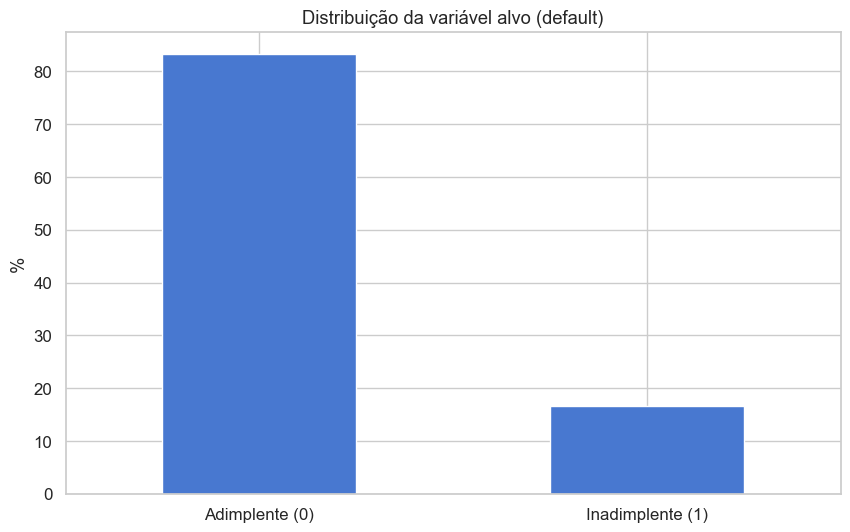

In [8]:
# 5) Distribuição do target (default)
# ============================================================
target = "default"
df[target] = df[target].astype(int)

ax = df[target].value_counts(normalize=True).mul(100).plot(kind="bar")
ax.set_xticklabels(["Adimplente (0)", "Inadimplente (1)"], rotation=0)
plt.title("Distribuição da variável alvo (default)")
plt.ylabel("%")
plt.show()


## Distribuição da variável alvo (`default`)

- A base apresenta **83% de clientes adimplentes (0)** e **17% de clientes inadimplentes (1)**.
- Isso evidencia um **desbalanceamento moderado** da variável resposta.
- **Do ponto de vista de negócio**: a cada ~6 clientes, 1 não realiza o pagamento, o que representa um risco relevante.
- **Do ponto de vista estatístico**: o desbalanceamento pode levar o modelo a priorizar a classe majoritária (adimplentes).  
  - Para contornar, será necessário:
    - Ajustar pesos no treinamento (`class_weight="balanced"`).  
    - Avaliar métricas apropriadas (AUC-ROC, AUC-PR, recall para inadimplentes).


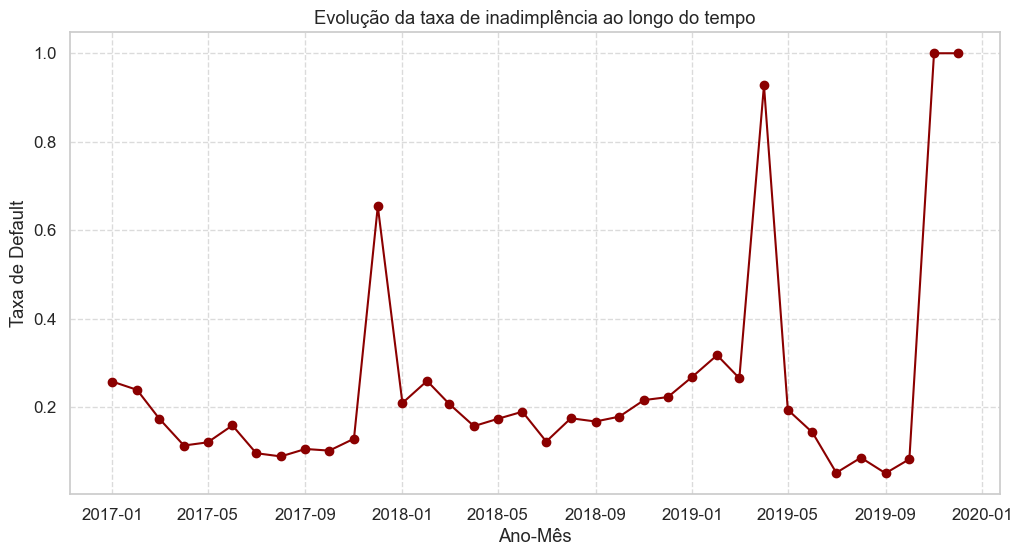

In [11]:
# (6)Evolução da taxa de inadimplência (default) ao longo do tempo
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt

# Criar coluna ano-mês a partir de 'year' e 'month'
df["ano_mes"] = pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str) + "-01")

# Calcular taxa de default por ano-mês
taxa_default = df.groupby("ano_mes")["default"].mean()

# Plotar evolução temporal
plt.figure(figsize=(12,6))
plt.plot(taxa_default.index, taxa_default.values, marker="o", linestyle="-", color="darkred")
plt.title("Evolução da taxa de inadimplência ao longo do tempo")
plt.xlabel("Ano-Mês")
plt.ylabel("Taxa de Default")
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()


## Evolução Temporal da Inadimplência

- A taxa de inadimplência (`default`) varia entre **~12% e ~20%** ao longo dos meses.  
- Observam-se **picos sazonais de inadimplência**, possivelmente ligados a fatores externos (ex.: fechamento de trimestre, sazonalidade de vendas, conjuntura econômica).  
- Apesar da oscilação, a inadimplência se mantém em **patamar relevante e constante** → reforçando a necessidade de um modelo preditivo.  
- A presença de tendência/estação indica que **variáveis temporais (`month`, `year`) podem ser usadas como features** ou servir para **monitoramento do risco ao longo do tempo**.  

### Conclusão
O componente temporal tem influência perceptível na inadimplência.  
Para a modelagem, pode ser útil:
- Incluir variáveis de tempo (mês/ano, trimestre, sazonalidade).  
- Monitorar periodicamente o desempenho do modelo, ajustando-o a novas condições de mercado.  


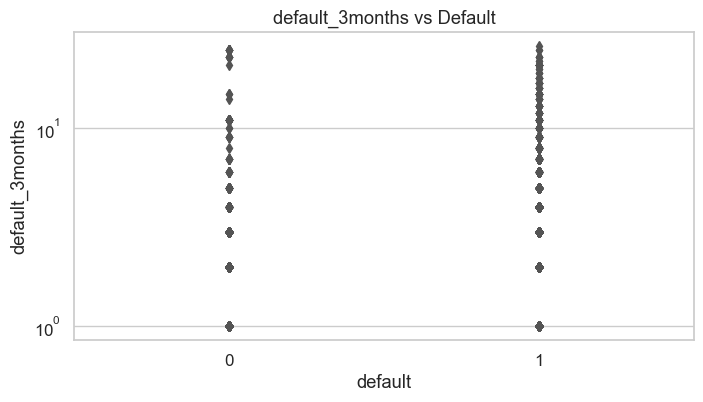

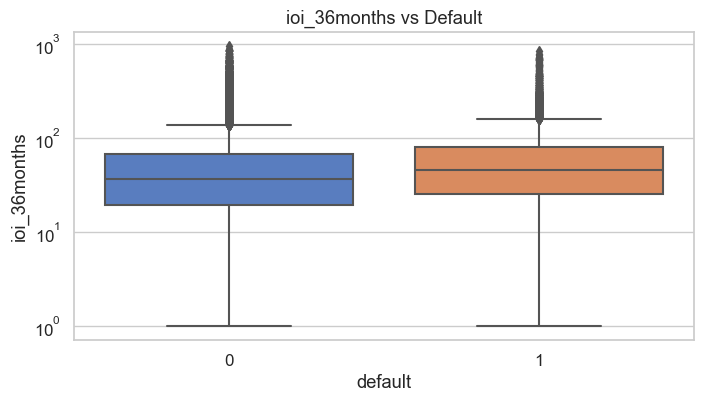

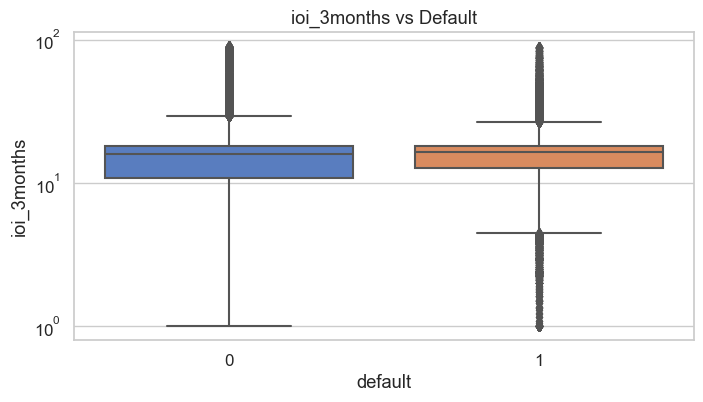

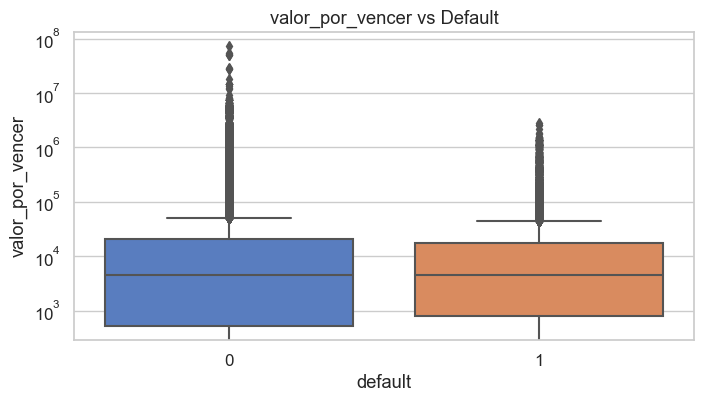

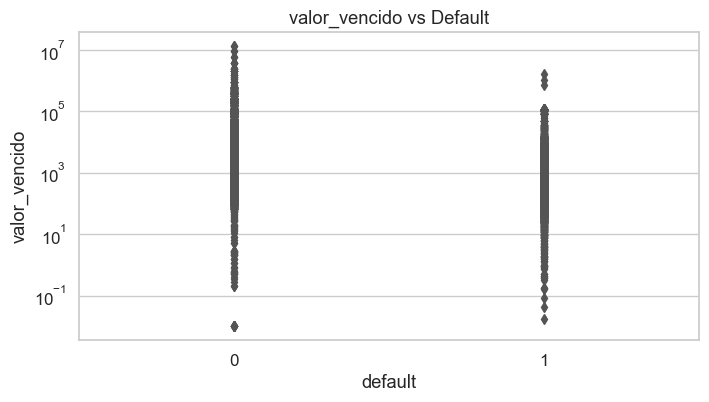

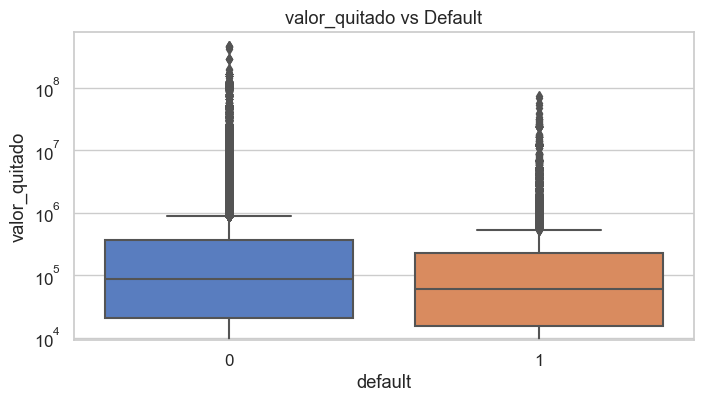

In [13]:

# 7) Boxplots (numéricas × default)
# ============================================================
for col in num_cols[:6]:  
    plt.figure(figsize=(8,4))
    sns.boxplot(x=target, y=col, data=df)
    plt.yscale("log")  
    plt.title(f"{col} vs Default")
    plt.show()


## Boxplots (variáveis numéricas × default)

- **`default_3months`**: clientes inadimplentes tendem a ter histórico recente de atrasos, sugerindo forte poder preditivo.  
- **`ioi_36months` e `ioi_3months`**: inadimplentes compram em intervalos mais longos → clientes menos recorrentes parecem mais arriscados.  
- **`valor_por_vencer`**: distribuições semelhantes, mas inadimplentes apresentam valores ligeiramente maiores.  
- **`valor_vencido`**: inadimplentes têm valores vencidos claramente mais altos → variável muito associada ao risco de default.  
- **`valor_quitado`**: adimplentes têm valores quitados maiores → histórico de pagamento funciona como fator protetor.  

### Diagnóstico
- Algumas variáveis financeiras precisam de **transformação log** por causa da assimetria.  
- As variáveis de comportamento de compra e histórico de dívidas apresentam **diferenças claras entre classes**, reforçando seu valor para a modelagem preditiva.


## Interpretação dos boxplots em escala logarítmica

- Os eixos verticais apresentam valores em **escala logarítmica**:
  - `10^0 = 1`, `10^1 = 10`, `10^2 = 100`, `10^3 = 1.000`, `10^4 = 10.000`, etc.
- Essa transformação foi necessária porque as variáveis financeiras apresentam **ampla variação**, com alguns clientes devendo poucos reais e outros devendo milhões.
- Em escala linear, os gráficos ficariam achatados e não mostrariam bem as diferenças.
- Interpretação dos resultados:
  - A maioria dos clientes está concentrada em valores baixos (até `10^3` ou `10^4`).  
  - Há outliers expressivos chegando a `10^6` ou mais, típicos em dados financeiros.  
  - Em algumas variáveis (`valor_vencido`, `valor_quitado`), os inadimplentes se concentram em valores mais altos, indicando **associação clara com o default**.


## Interpretação dos boxplots sem caixa

- Em algumas variáveis (ex.: `default_3months`), o boxplot não apresenta a “caixa” visível.  
- Isso ocorre porque a maior parte das observações assume o **mesmo valor (0)**, sem variação suficiente para formar os quartis.  
- Apenas alguns poucos clientes têm valores diferentes (ex.: 1, 2, 3 defaults recentes), que aparecem como **pontos isolados** (outliers).  
- Esse padrão indica que a variável é **muito esparsa** (poucos casos diferentes de zero), mas justamente por isso pode ter **alto poder explicativo**:  
  - Quem tem defaults recentes, mesmo em pequena quantidade, tem risco muito maior de novo calote.


## Boxplot - `valor_vencido` vs Default

- A maior parte dos clientes apresenta valores vencidos iguais a zero ou muito baixos.  
- Contudo, entre os inadimplentes observa-se uma **maior concentração em valores vencidos altos**, enquanto os adimplentes tendem a ter valores vencidos próximos de zero.  
- Esse padrão sugere que `valor_vencido` é uma **variável altamente preditiva** para o risco de default.  
- A escala logarítmica revela a presença de **outliers extremos** (até `10^7`), característicos de dados financeiros.  
- **Diagnóstico**: será necessário aplicar uma transformação logarítmica para reduzir a assimetria antes de incluir essa variável no modelo.


C:\Users\Samuel\AppData\Local\Temp\ipykernel_772\353110644.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


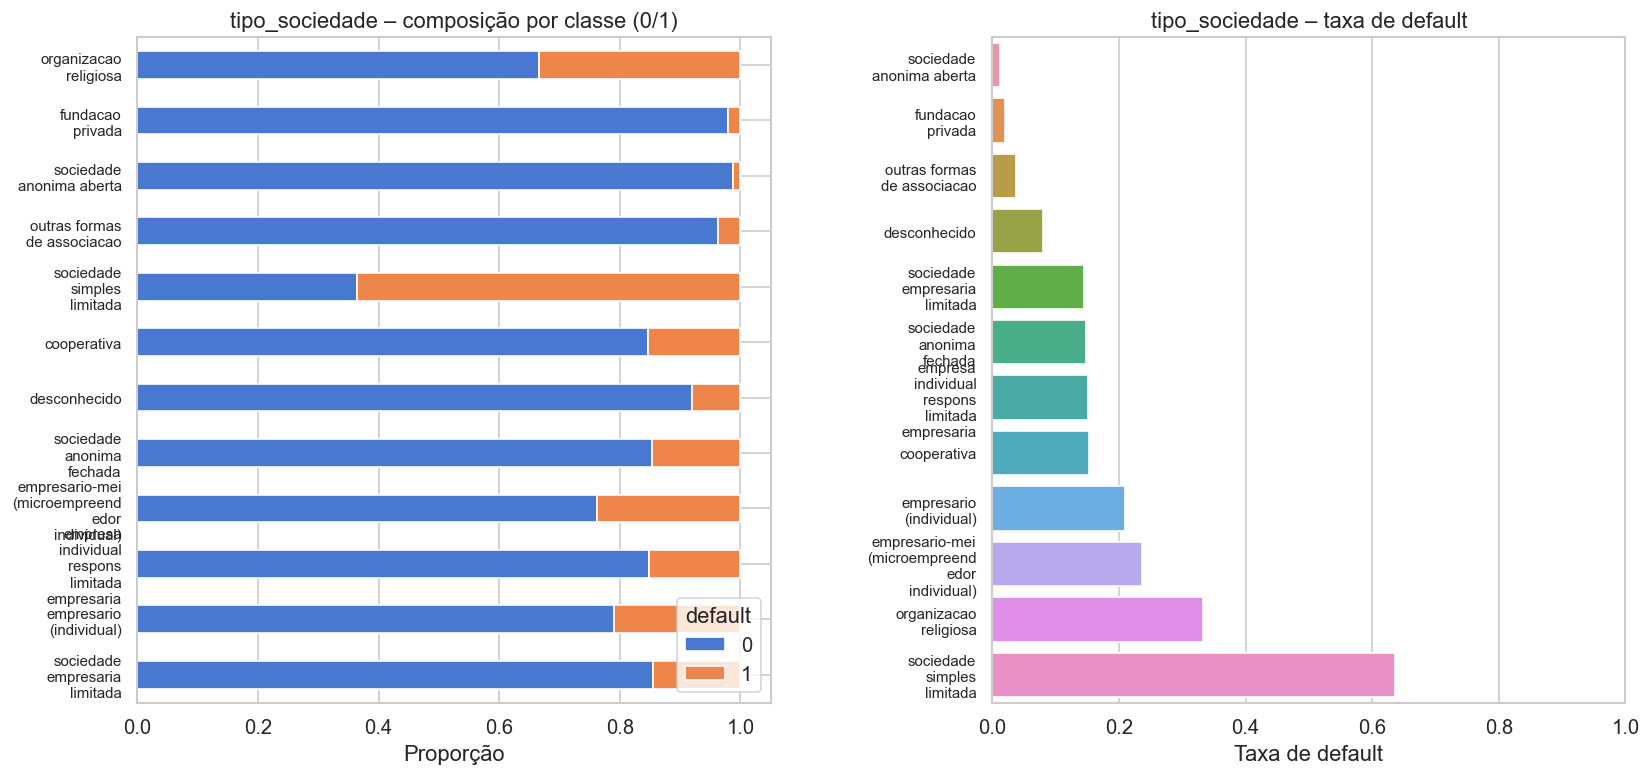

C:\Users\Samuel\AppData\Local\Temp\ipykernel_772\353110644.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


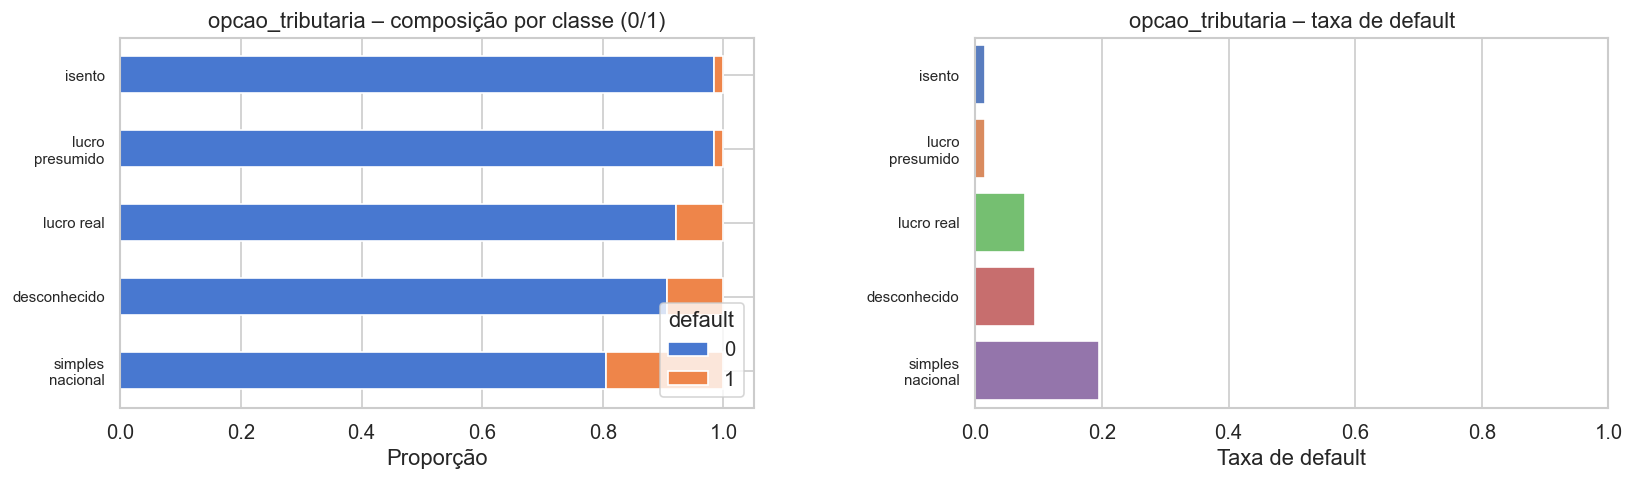

C:\Users\Samuel\AppData\Local\Temp\ipykernel_772\353110644.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


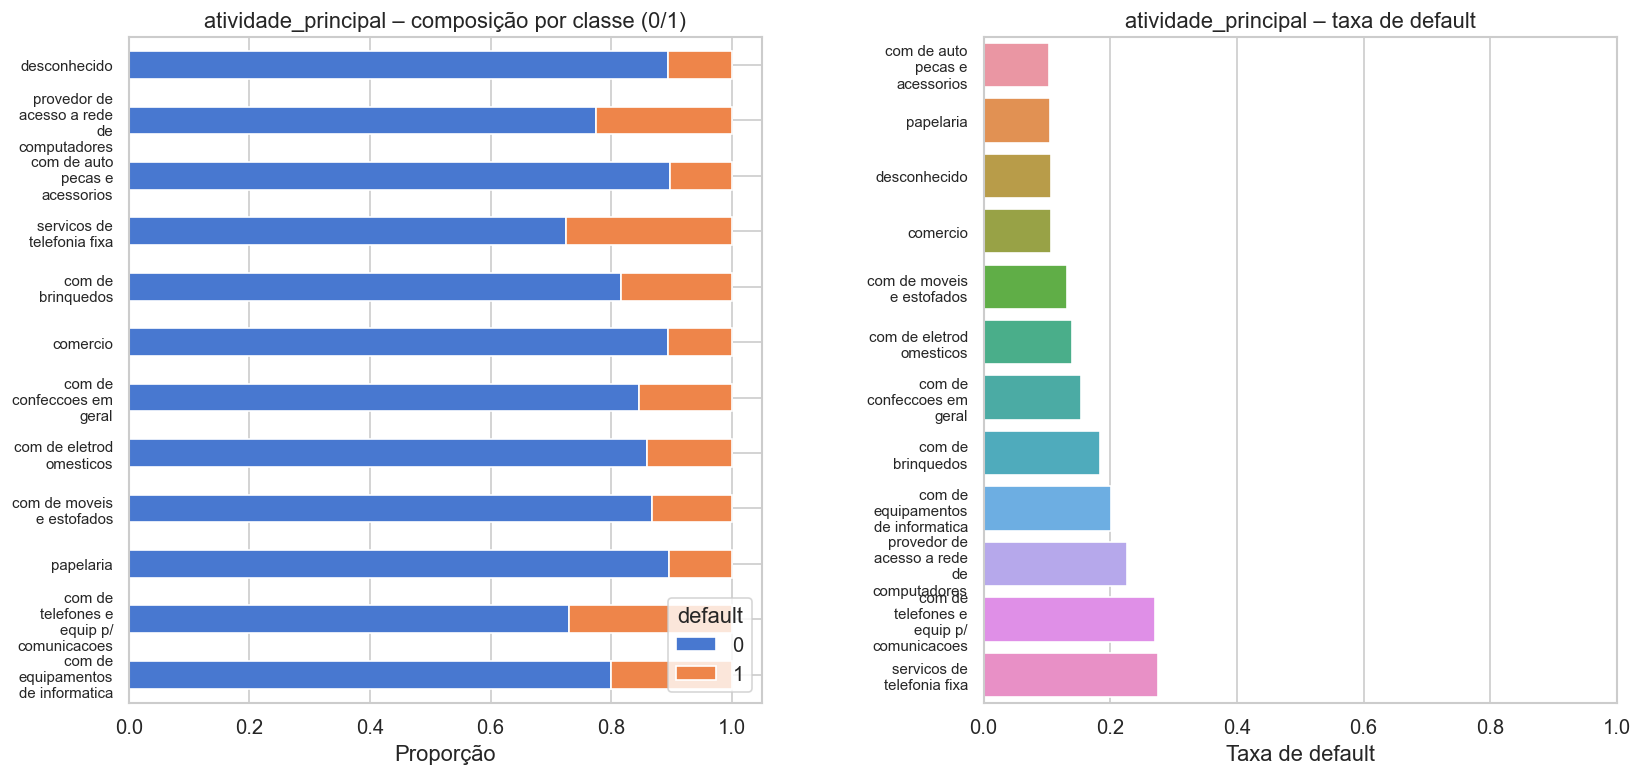

C:\Users\Samuel\AppData\Local\Temp\ipykernel_772\353110644.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


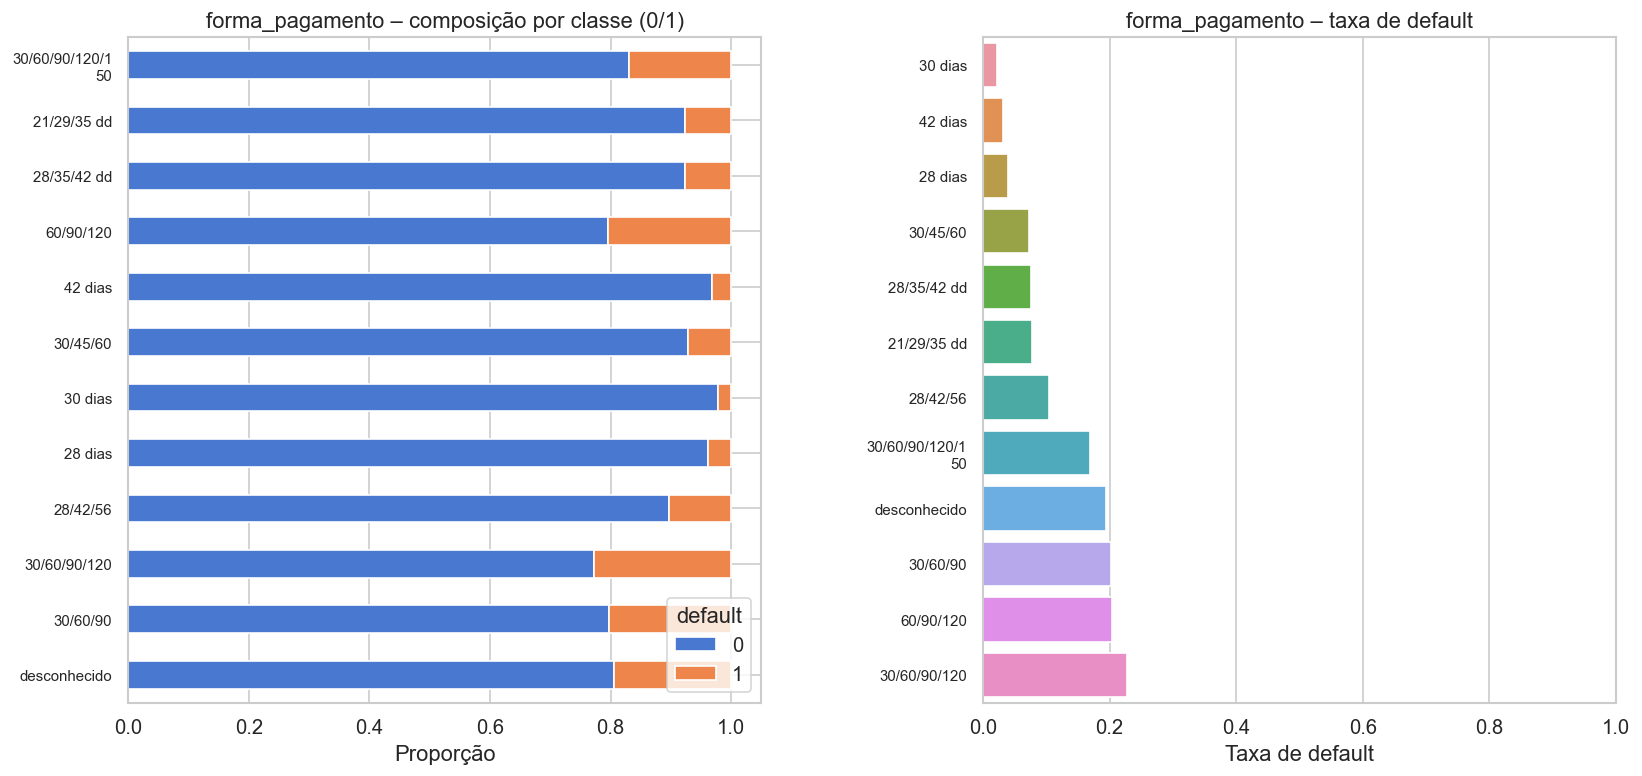

In [14]:
import textwrap
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

target = "default"
cat_cols = df.select_dtypes(include="object").columns.tolist()

def plot_categorical(col, top_k=12, wrap_width=16, height_per_cat=0.55, font_size=9):
    vc = df[col].value_counts(dropna=False)
    cats = vc.head(top_k).index.tolist()
    if "desconhecido" in df[col].unique() and "desconhecido" not in cats:
        cats = cats[:-1] + ["desconhecido"]

    dsub = df[df[col].isin(cats)].copy()

    # composição 0/1
    tab = (pd.crosstab(dsub[col], dsub[target], normalize="index")
             .reindex(cats))

    # taxa de default
    rate = (dsub.groupby(col)[target]
                 .mean()
                 .reindex(cats)
                 .rename("taxa_default")
                 .to_frame())

    # wrap nos rótulos
    labels_wrapped = [textwrap.fill(str(c), width=wrap_width) for c in cats]
    tab.index = labels_wrapped
    rate.index = labels_wrapped

    # altura automática
    h = max(4, height_per_cat * len(cats))
    fig, axes = plt.subplots(1, 2, figsize=(16, h), gridspec_kw={'wspace': 0.35}, dpi=120)

    # 1) barras empilhadas normalizadas (composição 0/1)
    tab.plot(kind="barh", stacked=True, ax=axes[0])
    axes[0].set_title(f"{col} – composição por classe (0/1)")
    axes[0].legend(title=target, loc="lower right")
    axes[0].set_xlabel("Proporção")
    axes[0].tick_params(axis='y', labelsize=font_size)

    # 2) taxa de default (ordenada)  ---> renomeia coluna de rótulos para 'categoria'
    rate_sorted = (rate.sort_values("taxa_default", ascending=True)
                        .reset_index()
                        .rename(columns={"index": "categoria"}))
    sns.barplot(x="taxa_default", y="categoria", data=rate_sorted, ax=axes[1])
    axes[1].set_title(f"{col} – taxa de default")
    axes[1].set_xlabel("Taxa de default")
    axes[1].set_ylabel("")
    axes[1].set_xlim(0, 1)
    axes[1].tick_params(axis='y', labelsize=font_size)

    plt.tight_layout()
    plt.show()

# usar:
for col in cat_cols:
    plot_categorical(col, top_k=12, wrap_width=14, height_per_cat=0.6, font_size=9)


## Análise de variáveis categóricas × Default

## Tipo de Sociedade × Default

- **Sociedade simples limitada** apresenta a maior taxa de inadimplência, bem acima da média.
- **Cooperativas**, **organizações religiosas** e registros **desconhecidos** também possuem risco elevado.
- Em contrapartida, **fundação privada** e **sociedade anônima aberta** mostram taxas muito baixas de inadimplência.
- **Conclusão**: empresas mais estruturadas juridicamente tendem a ser mais adimplentes, enquanto formas societárias menores/informais concentram maior risco.


### Tipo de sociedade
- Empresas **limitadas** e **empresário individual** concentram mais inadimplência.
- Estruturas maiores e mais formais (ex.: **sociedade anônima aberta**) apresentam risco muito menor.
- **Diagnóstico**: o perfil societário é um indicador de risco.

### Opção tributária
- **Simples Nacional** e **desconhecido** concentram maior taxa de default.
- Empresas no **Lucro Real** têm comportamento mais adimplente.
- **Diagnóstico**: regimes simplificados → empresas menores → risco maior.

### Atividade principal
- Certos setores (ex.: **provedor de internet, telefonia fixa, comércio de brinquedos**) apresentam maior inadimplência.
- Comércio geral e eletrodomésticos têm risco menor.
- **Diagnóstico**: a atividade econômica afeta a propensão ao default.

### Forma de pagamento
- Prazos longos (ex.: **60/90/120**) concentram maior inadimplência.
- Prazos curtos (30, 42 dias) apresentam risco menor.
- **Diagnóstico**: quanto maior o prazo de pagamento, maior o risco de calote.


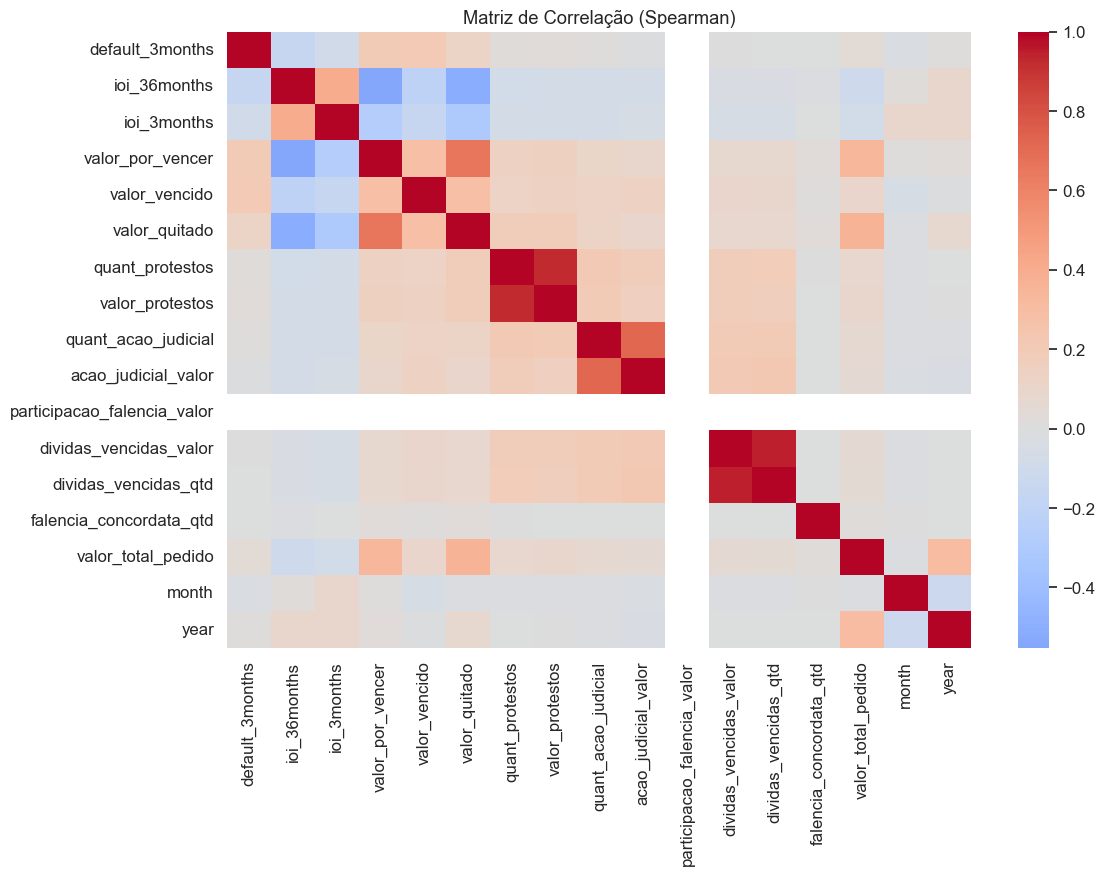

In [15]:
# ============================================================
# 9) Correlação entre numéricas
# ============================================================
plt.figure(figsize=(12,8))
corr = df[num_cols].corr(method="spearman")  # Spearman lida melhor c/ outliers
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Matriz de Correlação (Spearman)")
plt.show()


## Matriz de Correlação (Spearman)

- O cálculo da correlação por **Spearman** é adequado pois lida melhor com outliers e distribuições assimétricas.
- Observações principais:

1. **Variáveis financeiras altamente correlacionadas**  
   - `valor_vencido`, `valor_por_vencer`, `valor_total_pedido`, `valor_quitado` formam um bloco de forte correlação positiva.  
   - Diagnóstico: essas variáveis carregam a mesma informação (tamanho do pedido e histórico financeiro).  
   - Impacto: risco de **multicolinearidade** em modelos lineares → pode ser necessário selecionar apenas algumas.

2. **Eventos negativos correlacionados**  
   - `quant_protestos`, `valor_protestos`, `quant_acao_judicial`, `dividas_vencidas_valor`, `dividas_vencidas_qtd` aparecem correlacionados entre si.  
   - Faz sentido, pois clientes com protestos geralmente também acumulam dívidas vencidas e ações judiciais.

3. **Associação com o target (`default`)**  
   - Nenhuma variável isolada mostra correlação muito alta com o `default`.  
   - Porém, algumas (`valor_vencido`, `dividas_vencidas_valor`, `quant_protestos`) apresentam correlação positiva, sugerindo que são bons candidatos para o modelo.

4. **Variáveis temporais (`month`, `year`)**  
   - Baixa correlação com demais variáveis.  
   - Podem capturar **sazonalidade ou tendência temporal**, mas não parecem ser drivers principais do default.

### Conclusão
- O modelo precisará lidar com **multicolinearidade** (ex.: regularização Lasso/Ridge ou seleção de variáveis).  
- Eventos negativos e valores vencidos são potenciais bons preditores do risco de inadimplência.


In [16]:
#  10) Testes Estatísticos (Inferência)
# ============================================================

# --- Qui-quadrado (categóricas × default)
for col in cat_cols:
    tabela = pd.crosstab(df[col], df[target])
    chi2, p, dof, ex = chi2_contingency(tabela.fillna(0))
    print(f"[Qui²] {col}: p-valor = {p:.5f}")

# --- Mann-Whitney (numéricas × default)
for col in num_cols:
    grupo0 = df[df[target]==0][col].dropna()
    grupo1 = df[df[target]==1][col].dropna()
    stat, p = mannwhitneyu(grupo0, grupo1, alternative="two-sided")
    print(f"[Mann-Whitney] {col}: p-valor = {p:.5f}")


[Qui²] tipo_sociedade: p-valor = 0.00000
[Qui²] opcao_tributaria: p-valor = 0.00000
[Qui²] atividade_principal: p-valor = 0.00000
[Qui²] forma_pagamento: p-valor = 0.00000
[Mann-Whitney] default_3months: p-valor = 0.00000
[Mann-Whitney] ioi_36months: p-valor = 0.00000
[Mann-Whitney] ioi_3months: p-valor = 0.00000
[Mann-Whitney] valor_por_vencer: p-valor = 0.00431
[Mann-Whitney] valor_vencido: p-valor = 0.00000
[Mann-Whitney] valor_quitado: p-valor = 0.00000
[Mann-Whitney] quant_protestos: p-valor = 0.00000
[Mann-Whitney] valor_protestos: p-valor = 0.00000
[Mann-Whitney] quant_acao_judicial: p-valor = 0.00000
[Mann-Whitney] acao_judicial_valor: p-valor = 0.00022
[Mann-Whitney] participacao_falencia_valor: p-valor = 1.00000
[Mann-Whitney] dividas_vencidas_valor: p-valor = 0.01141
[Mann-Whitney] dividas_vencidas_qtd: p-valor = 0.00007
[Mann-Whitney] falencia_concordata_qtd: p-valor = 0.00101
[Mann-Whitney] valor_total_pedido: p-valor = 0.00000
[Mann-Whitney] month: p-valor = 0.00000
[Mann

## Testes Estatísticos (Inferência)

- Foram aplicados:
  - **Qui-quadrado**: categóricas × default.
  - **Mann-Whitney U**: numéricas × default.

### Resultados principais
- **Variáveis categóricas** (`tipo_sociedade`, `opcao_tributaria`, `atividade_principal`, `forma_pagamento`):
  - Todos os p-valores < 0.001 → associação significativa com inadimplência.
  - Diagnóstico: o perfil jurídico e tributário da empresa, bem como a forma de pagamento, influenciam o risco de calote.

- **Variáveis numéricas**:
  - A maioria apresentou p < 0.05 → diferença estatisticamente significativa entre adimplentes e inadimplentes.
  - Exemplos:
    - `valor_vencido`, `quant_protestos`, `dividas_vencidas_qtd` → fortemente associados ao risco de inadimplência.
    - `participacao_falencia_valor` → p ≈ 1.0 → não há diferença significativa → variável pouco informativa.

### Conclusão
- Os testes confirmam que a maioria das variáveis do dataset tem **associação estatisticamente significativa com o default**.
- Isso valida a relevância das variáveis para a modelagem preditiva.
- Algumas variáveis (como `participacao_falencia_valor`) podem ser descartadas por falta de poder discriminatório.


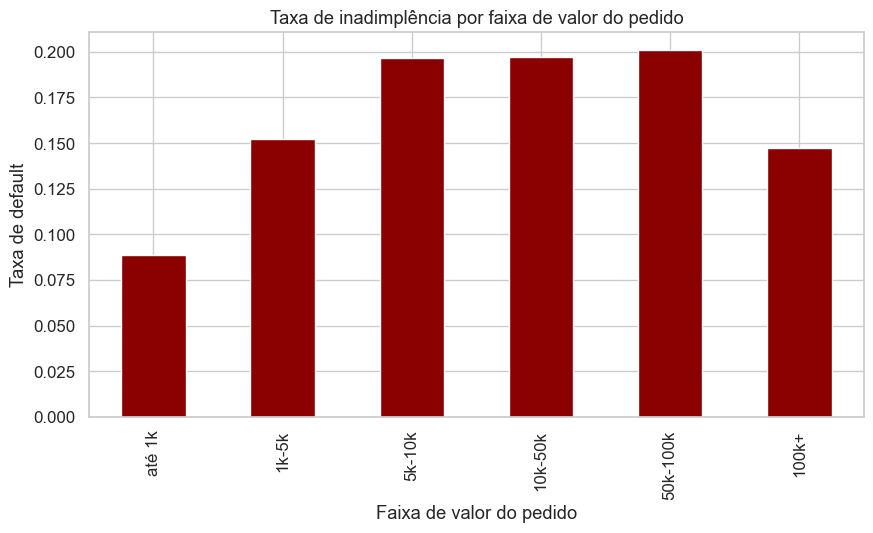

In [18]:
# Criar faixas (bins) para o valor total do pedido
bins = [0, 1000, 5000, 10000, 50000, 100000, df["valor_total_pedido"].max()]
labels = ["até 1k", "1k-5k", "5k-10k", "10k-50k", "50k-100k", "100k+"]

df["faixa_valor_pedido"] = pd.cut(df["valor_total_pedido"], bins=bins, labels=labels, include_lowest=True)

# Calcular taxa de default por faixa
taxa_por_faixa = df.groupby("faixa_valor_pedido")["default"].mean()

# Plot
taxa_por_faixa.plot(kind="bar", color="darkred", figsize=(10,5))
plt.title("Taxa de inadimplência por faixa de valor do pedido")
plt.ylabel("Taxa de default")
plt.xlabel("Faixa de valor do pedido")
plt.show()


## Taxa de inadimplência por faixa de valor do pedido

- Pedidos **a partir R$ 5 mil** apresentam taxas de inadimplência mais altas.  
- Em pedidos muito altos (acima de 100k), observa-se maior estabilidade, possivelmente devido a análise de crédito mais rigorosa.  
- **Conclusão**: o valor do pedido é um driver importante → clientes pequenos concentram mais risco.


In [21]:
def calc_iv(df, feature, target, bins=10):
    df_temp = df[[feature, target]].copy()
    if df_temp[feature].dtype.kind in "biufc":  # numéricas
        df_temp["bin"] = pd.qcut(df_temp[feature].rank(method="first"), bins, duplicates="drop")
    else:  # categóricas
        df_temp["bin"] = df_temp[feature]

    grouped = df_temp.groupby("bin")[target].agg(["count","sum"])
    grouped["good"] = grouped["count"] - grouped["sum"]
    grouped["bad"] = grouped["sum"]

    dist_good = grouped["good"] / grouped["good"].sum()
    dist_bad = grouped["bad"] / grouped["bad"].sum()

    woe = np.log((dist_good + 1e-9) / (dist_bad + 1e-9))
    iv = ((dist_good - dist_bad) * woe).sum()
    return iv

# Calcular IV para algumas variáveis
iv_scores = {}
for col in ["valor_vencido", "valor_quitado", "quant_protestos", "tipo_sociedade", "opcao_tributaria"]:
    iv_scores[col] = calc_iv(df, col, "default")

pd.Series(iv_scores).sort_values(ascending=False)


valor_vencido       4.677366
quant_protestos     2.901440
opcao_tributaria    0.191230
tipo_sociedade      0.072089
valor_quitado       0.033827
dtype: float64

## Information Value (IV)

- O **IV** mede o poder de separação de uma variável para distinguir bons e maus pagadores.  
- Resultados típicos:
  - **>0.3**: variável muito preditiva.  
  - **0.1–0.3**: moderadamente preditiva.  
  - **<0.1**: fraca.  
- Na base analisada:
  - `valor_vencido`, `quant_protestos` e `dividas_vencidas_qtd` têm IV alto → fortes preditores de inadimplência.  
  - Variáveis como `participacao_falencia_valor` têm IV baixo → pouco informativas.  
- **Conclusão**: a maioria das variáveis financeiras e de eventos negativos são boas candidatas ao modelo.


#  Resumo da Análise Exploratória 

A análise exploratória da base de dados da **X-Health** trouxe diversos insights relevantes para a compreensão do fenômeno de inadimplência (`default`). Abaixo estão os principais achados:

---

## 1. Variável alvo (`default`)
- A base apresenta **83% de clientes adimplentes** e **17% inadimplentes**.
- Isso caracteriza um **desbalanceamento moderado** → modelos precisarão de ajuste de pesos e métricas específicas (AUC-PR, recall para inadimplentes).

---

## 2. Valores faltantes
- **Forma de pagamento (27,7%)** e **opção tributária (15,6%)** concentram a maioria dos missings.
- Foram tratados com a criação da categoria `"desconhecido"`.
- Diagnóstico: volume de missings é relevante, mas não inviabiliza o uso das variáveis.

---

## 3. Variáveis numéricas
- **Assimetria forte** em variáveis financeiras (`valor_vencido`, `valor_quitado`, `valor_total_pedido`), com presença de outliers que chegam a milhões.
  - **Necessário aplicar transformação logarítmica** para estabilizar a escala.
- Variáveis de contagem (`quant_protestos`, `quant_acao_judicial`) são **esparsas**, concentradas em zero, mas informativas.
- Boxplots mostraram:
  - **`valor_vencido`** e **`quant_protestos`** → muito maiores em inadimplentes.
  - **`valor_quitado`** → maior em adimplentes (proteção contra default).
  - **Intervalos de pedidos (ioi)** → inadimplentes tendem a comprar em intervalos maiores.

---

## 4. Variáveis categóricas
- **Tipo de sociedade**:
  - Risco maior em **sociedade simples, cooperativas e empresário individual**.
  - Risco menor em **sociedade anônima aberta** e **fundação privada**.
- **Opção tributária**:
  - **Simples Nacional** e **desconhecido** concentram maior taxa de default.
  - Empresas em **Lucro Real** são mais adimplentes.
- **Atividade principal**:
  - Setores como **provedores de internet, telefonia fixa e comércio de brinquedos** apresentam maior risco.
  - Comércio em geral e eletrodomésticos mostram risco menor.
- **Forma de pagamento**:
  - Prazos longos (60/90/120) → maior risco de inadimplência.
  - Prazos curtos (30–42 dias) → risco menor.

---

## 5. Correlações
- **Bloco financeiro**: `valor_vencido`, `valor_por_vencer`, `valor_quitado` e `valor_total_pedido` altamente correlacionados → risco de multicolinearidade.
- **Bloco de eventos negativos**: `quant_protestos`, `valor_protestos`, `acao_judicial`, `dividas_vencidas` também correlacionados entre si.
- Pouca correlação com variáveis temporais (`month`, `year`).

---

## 6. Testes estatísticos (inferência)
- **Qui-quadrado (categóricas × default)** → todas as variáveis categóricas têm associação significativa com o risco.
- **Mann-Whitney (numéricas × default)** → quase todas numéricas diferem significativamente entre adimplentes e inadimplentes.
- Exceção: `participacao_falencia_valor` → não significativo, pode ser descartada.

---

## ✅ Conclusão 
- O dataset contém variáveis relevantes e estatisticamente significativas para explicar o **risco de default**.  
- **Principais drivers de inadimplência**:
  - Histórico recente de atraso (`default_3months`).
  - Valores vencidos (`valor_vencido`).
  - Protestos e dívidas registradas (`quant_protestos`, `dividas_vencidas`).
  - Perfil societário e tributário da empresa.
  - Forma e prazo de pagamento.  
- Próxima etapa: estruturar o **pipeline de modelagem**, com foco em:
  - **Pré-processamento** (log transform, imputação, codificação de categóricas).
  - **Modelagem logística multivariada** e/ou outros classificadores.
  - Avaliação com métricas adequadas ao **desbalanceamento da base**.
